<a href="https://colab.research.google.com/github/andrewcampos1/Proyectos-de-IA/blob/main/TPF_IA_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
from keras.datasets import mnist
(train_inputs, train_labels),(test_inputs, test_labels)= mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


La variable train_inputs contiene imágenes sobre las que enseñaremos una red neuronal. Estamos tratando con un aprendizaje supervisado, por lo que para que la red aprenda, debe obtener información de nosotros sobre lo que está en la imagen. Esta información está en la variable train_labels. Llamaremos a estos datos “etiquetas”. La variable test_inputs contiene imágenes en las que comprobaremos si la red neuronal aprendida puede reconocer correctamente un dígito que no ha visto antes (en el que no aprendió). Para comprobar si la red neuronal ha evaluado correctamente el contenido de la imagen, también debemos tener etiquetas para el conjunto de prueba, que se encuentran en la variable test_labels.

In [ ]:
train_inputs.shape

(60000, 28, 28)

In [ ]:
test_inputs.shape

(10000, 28, 28)

Los datos de entrenamiento contienen, como se esperaba, 60 000 elementos, cada uno con un tamaño de 28 por 28 (píxeles). Los datos de prueba son 10.000. En ambos casos estamos tratando con arreglos tridimensionales, para los cuales la primera dimensión son muestras de datos posteriores (en total 60,000 y 10,000 respectivamente), y las siguientes dos dimensiones almacenan valores de píxeles para cada muestra (para cada imagen).

In [ ]:
clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

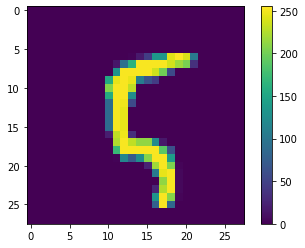

In [ ]:
plt.figure()
plt.imshow(train_inputs[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalizacion
train_inputs = train_inputs/255.0

test_inputs = test_inputs/255.0


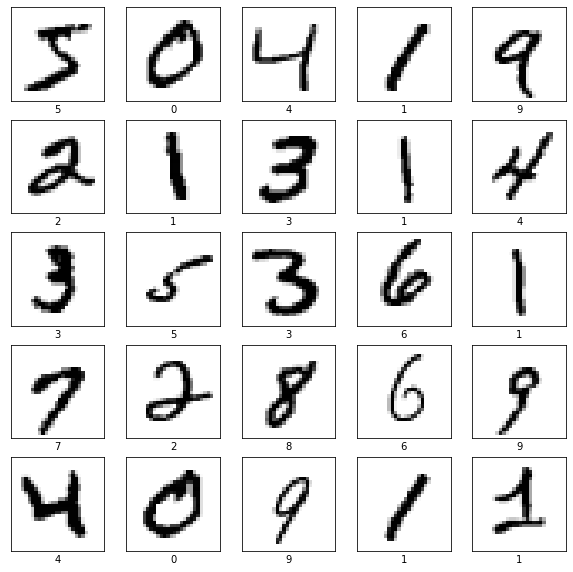

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i]])
plt.show()

In [ ]:
#Creacion del modelo
model = keras.Sequential([     #utilizamos keras para traer el objeto sequential que nos permite poder hacer un apilamiento de capas.
    keras.layers.Flatten(input_shape=(28, 28)), # capa de entrada tipo flatten, me pasa de la matriz imagen 28x28 a un vetor de 784 neuronas.(perdemos la ubicacion espacial del pixel, se soluciona con cnn)
    keras.layers.Dense(128, activation='relu'), # capa densa(full conected) oculta de 128 neuronas con funcion de activacion relu.
    keras.layers.Dense(10, activation='softmax') # capa de salida densa de 10 neuronas(numeros de 0 a 9, las 10 categorias) con activacion softmax.
])

In [ ]:
#compilar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #El propósito de las funciones de pérdida es calcular la cantidad que un modelo debería tratar de minimizar durante el entrenamiento.
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# entrenar
history=model.fit(train_inputs, train_labels,
                  epochs=5, #cantidad de epocas
                  batch_size=100, # entrenamos de a grupos de 100 imagenes,para hacerlo mas rapido, ya que el backpropagation(ajustar los pesos) lo hace despues de 100 imagenes y no cada vez con 1 imagen
                  shuffle=True, # cambia el orden
                  validation_data=(test_inputs, test_labels))

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3355 - accuracy: 0.9072 - val_loss: 0.1867 - val_accuracy: 0.9460
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1593 - accuracy: 0.9548 - val_loss: 0.1353 - val_accuracy: 0.9603
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1141 - accuracy: 0.9672 - val_loss: 0.1103 - val_accuracy: 0.9673
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0857 - accuracy: 0.9756 - val_loss: 0.0955 - val_accuracy: 0.9706
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0690 - accuracy: 0.9801 - val_loss: 0.0859 - val_accuracy: 0.9740


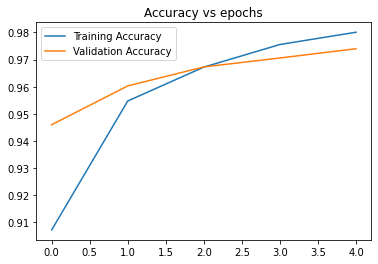

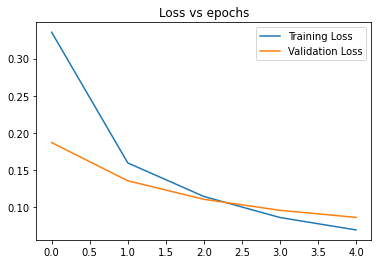

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])

#el accuracy de training siempre es mayor que el validation ya que con esas aprendio y las otras no las vio nunca
#loss es cuanto difiere mi salida de la esperada
plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
predictions = model.predict(test_inputs)

313/313 [==============================] - 1s 2ms/step


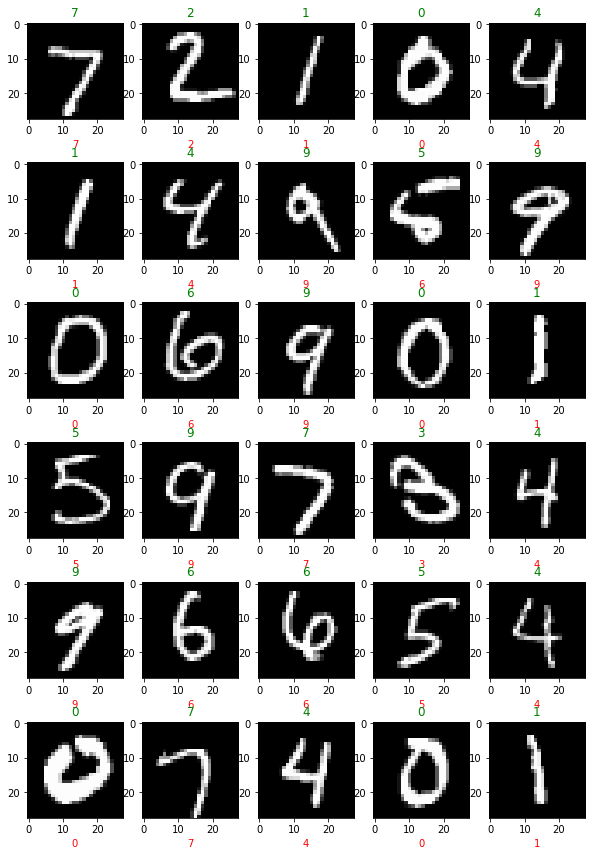

In [ ]:
plt.figure(figsize=(10,15))
for i in range(30):
    plt.subplot(6,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)

    plt.imshow(test_inputs[i].reshape(28,28), 'gray')
    plt.title(clases[test_labels[i]], color='g')
    plt.xlabel(clases[np.argmax(predictions[i])], color='r')

plt.show()

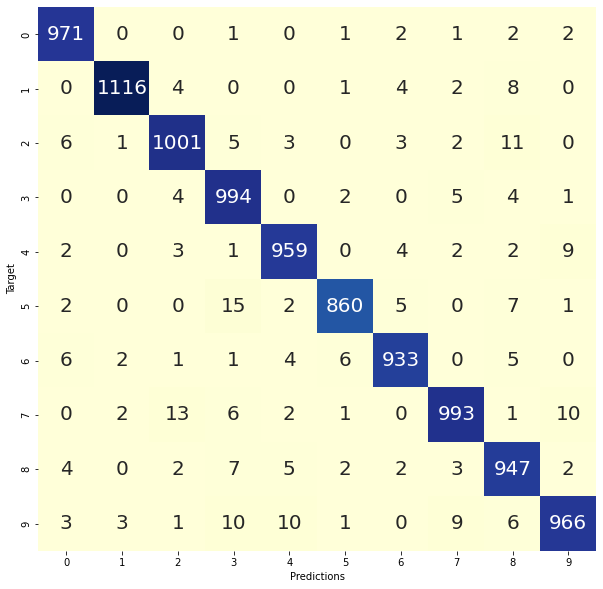

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

In [ ]:
# confundio un poco el 4 con el 9 (20 veces), el 5 con el 3, el 7 con el 2, 9 y 7

In [ ]:
loss, acc = model.evaluate(test_inputs, test_labels, batch_size=100)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (100.0 * loss))

100/100 [==============================] - 1s 5ms/step - loss: 0.0859 - accuracy: 0.9740

Test accuracy: 97.4%

Test loss: 8.6%


# CNN

In [ ]:
#Descargar set de datos de MNIST (imagenes a color)
from tensorflow.keras import datasets, layers, models #cargamos librerias tensor flow
(train_inputs, train_labels),(test_inputs, test_labels)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
train_inputs.shape

(50000, 32, 32, 3)

In [ ]:
test_inputs.shape

(10000, 32, 32, 3)

In [ ]:
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

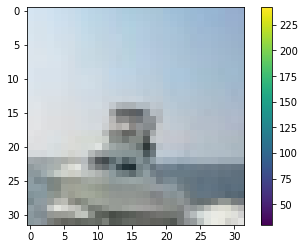

In [ ]:
plt.figure()
plt.imshow(train_inputs[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalizacion
train_inputs = train_inputs/255.0

test_inputs = test_inputs/255.0


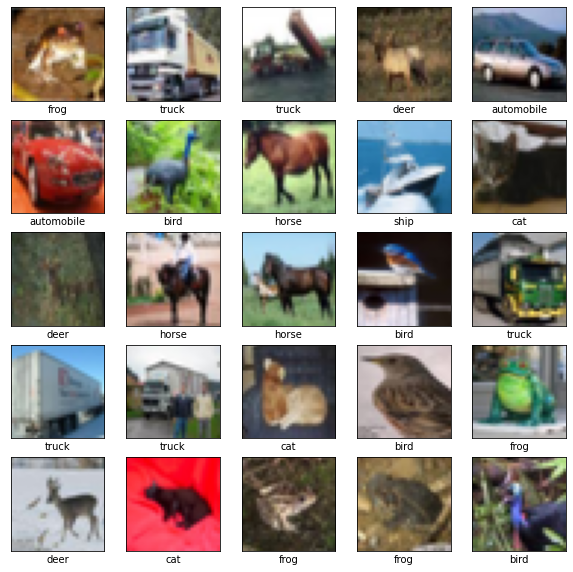

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i])
    plt.xlabel(clases[train_labels[i][0]])
plt.show()

In [ ]:
model= keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))

In [ ]:
model.add(layers.Conv2D(6,(5,5),activation='relu')) #6 filtros 5x5
model.summary()      # 32-5+1=28 tamaño de salida, 6 capas, ((5*5*3)+1)*6=456, parametros

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPool2D((2,2),strides=2))
model.summary() # cambia las dimensiones de la imagen y se queda con las caracteristicas mas significativas, de 28x28 a 14x14 la mitad por el stride que es 2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(16,(5,5),strides=(1,1),padding='valid',activation='relu')) # padding valid quiere decir que no lo aplicamos
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPool2D((2,2),strides=2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-traina

In [ ]:
model.add(keras.layers.Dense(120,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
model.add(keras.layers.Dense(84,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
model.add(keras.layers.Dense(10,activation='softmax')) #softmax x clasificacion no binaria
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
# compilar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# entrenar
history=model.fit(train_inputs, train_labels,
                  epochs=5, #cantidad de epocas
                  batch_size=100, # entrenamos de a grupos de 100 imagenes,para hacerlo mas rapido, ya que el backpropagation(ajustar los pesos) lo hace despues de 100 imagenes y no cada vez con 1 imagen
                  shuffle=True,
                  validation_data=(test_inputs, test_labels))

Epoch 1/5
500/500 [==============================] - 47s 93ms/step - loss: 1.6717 - accuracy: 0.3897 - val_loss: 1.4733 - val_accuracy: 0.4679
Epoch 2/5
500/500 [==============================] - 47s 94ms/step - loss: 1.3991 - accuracy: 0.4945 - val_loss: 1.3818 - val_accuracy: 0.5021
Epoch 3/5
500/500 [==============================] - 46s 91ms/step - loss: 1.2930 - accuracy: 0.5367 - val_loss: 1.2776 - val_accuracy: 0.5423
Epoch 4/5
500/500 [==============================] - 45s 91ms/step - loss: 1.2263 - accuracy: 0.5617 - val_loss: 1.2595 - val_accuracy: 0.5465
Epoch 5/5
500/500 [==============================] - 45s 90ms/step - loss: 1.1752 - accuracy: 0.5825 - val_loss: 1.2087 - val_accuracy: 0.5746


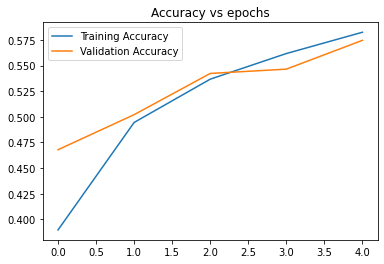

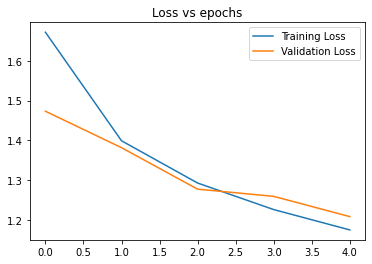

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])

#el accuracy de training siempre es mayor que el validation ya que con esas aprendio y las otras no las vio nunca
#loss es cuanto difiere mi salida de la esperada

plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
predictions = model.predict(test_inputs)

313/313 [==============================] - 5s 14ms/step


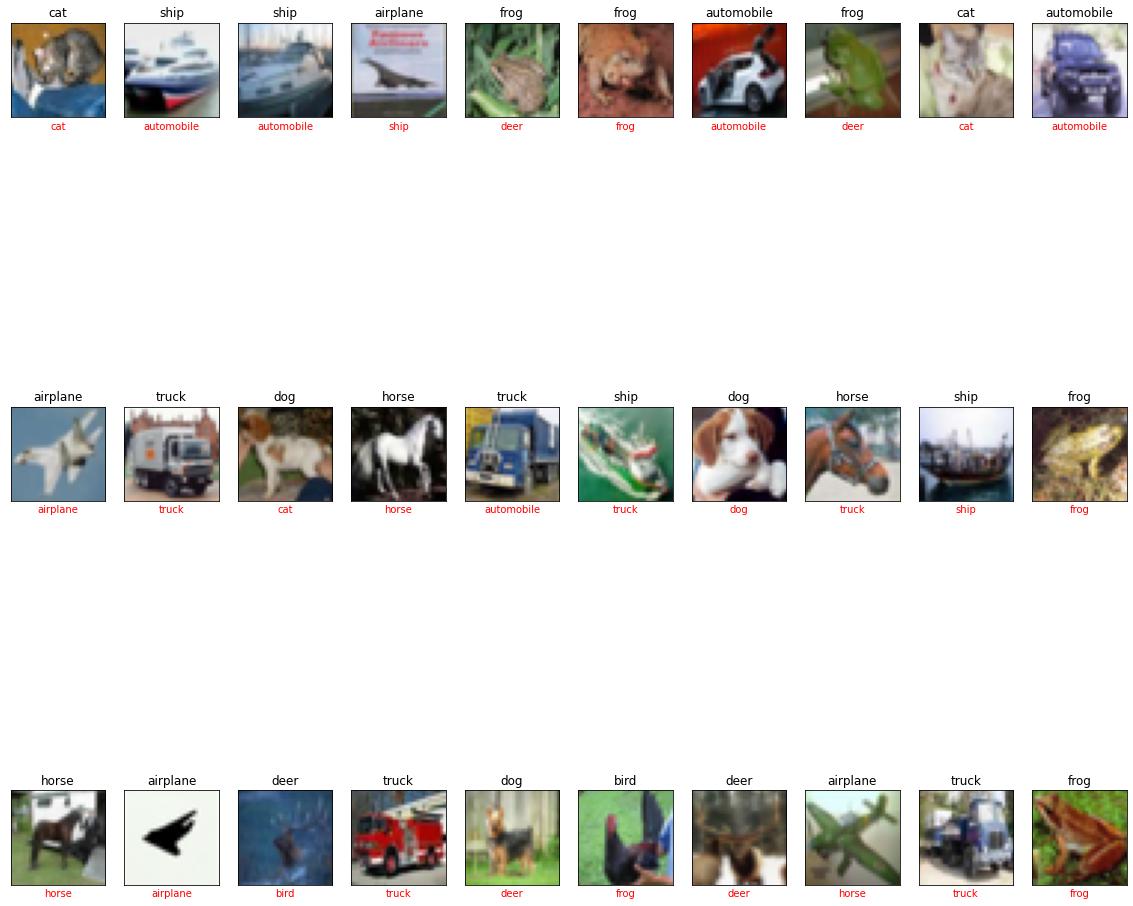

In [ ]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_inputs[i])
    plt.title(clases[test_labels[i][0]])
    plt.xlabel(clases[np.argmax(predictions[i])], color='r')
plt.show()

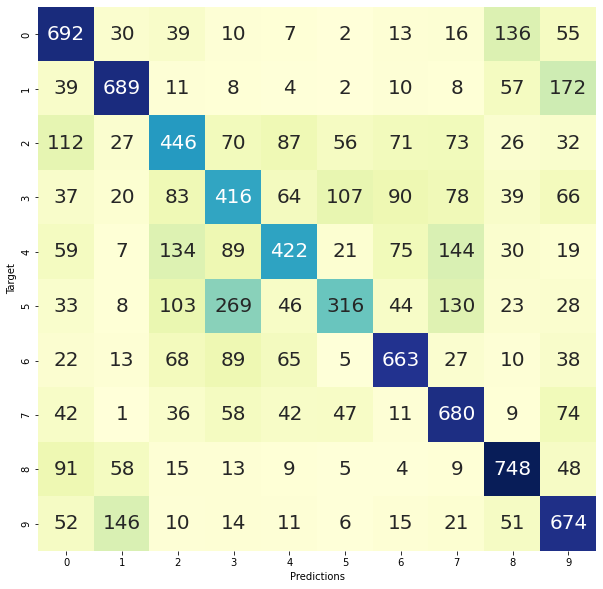

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

clases = 0 = airplane
         1 = automobile
         2 = bird
         3 = cat
         4 = deer
         5 = dog
         6 = frog
         7 = horse
         8 = ship
         9 = truck

In [ ]:
loss, acc = model.evaluate(test_inputs, test_labels, batch_size=100)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (100.0 * loss))

100/100 [==============================] - 4s 39ms/step - loss: 1.2087 - accuracy: 0.5746

Test accuracy: 57.5%

Test loss: 120.9%
